<h1><center>
    ECE 438 - Laboratory 6b<br/>
    Discrete Fourier Transform and Fast Fourier Transform Algorithms (Week 2)<br/>
    <small>Last updated on February 27, 2022</small>
</center></h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from helper import DTFT, DFTsum, hamming

In [2]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

<h2 style="color:salmon;"><left>1. Introduction</left></h2>

This is the second week of a two week laboratory that covers the Discrete Fourier Transform (DFT) and Fast Fourier Transform (FFT). The first week introduced the DFT and associated sampling and windowing effects. This laboratory will continue the discussion of the DFT and will introduce the FFT.

<h2 style="color:salmon;"><left>2. Continuation of DFT Analysis</left></h2>

This section continues the analysis of the DFT started in the previous week’s laboratory.
\begin{align*}
    (\text{DFT})\quad X_N[k]&=\sum_{n=0}^{N-1}x[n]e^{-j2\pi kn/N}\tag{1}\\
    (\text{inverse DFT})\quad x[n]&=\frac{1}{N}\sum_{k=0}^{N-1}X_N[k]e^{j2\pi kn/N}\tag{2}
\end{align*}

<h3 style="color:red;"><left>Exercise 2.1: Shifting the Frequency Range</left></h3>

In this section, we will illustrate a representation for the DFT of equation (1) that is a bit more intuitive. 

**1. Create a Hamming window ```x``` of length ```N = 20```, using the provided function `hamming()`, then compute the 20 point DFT of `x` using the provided function `DFTsum()`, and finally, plot the magnitude of the DFT, $|X_{20}(k)|$, versus the index $k$.**

In [3]:
# insert your code here


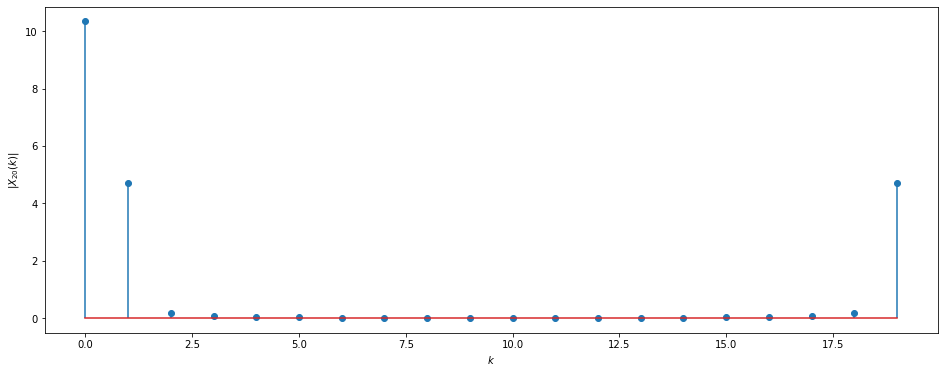

In [4]:
k = np.arange(20)
x = hamming(20)
X = DFTsum(x)
plt.stem(k, abs(X))
plt.xlabel(r"$k$")
plt.ylabel(r"$|X_{20}(k)|$")
plt.show()

---

Our plot of the DFT has two disadvantages. First, the DFT values are plotted against $k$ rather then the frequency $\omega$. Second, the arrangement of frequency samples in the DFT goes from $0$ to $2\pi$ rather than from $−\pi$ to $\pi$, as is conventional with the DTFT. In order to plot the DFT values similar to a conventional DTFT plot, we must compute the vector of frequencies in radians per sample, and then “rotate” the plot to produce the more familiar range, $−\pi$ to $\pi$.

Let’s first consider the vector ```w``` of frequencies in radians per sample. Each element of ```w``` should be the frequency of the corresponding DFT sample $X(k)$, which can be computed by

\begin{align*}
    \omega=2\pi k/N\quad k\in[0,\dots,N-1]\tag{3}
\end{align*}

However, the frequencies should also lie in the range from $-\pi$ to $\pi$. Therefore, if $\omega \geq \pi$, then it should be set to $\omega-2\pi$. An easy way of making this change in Python is
```python
w[w >= np.pi] = w[w >= np.pi] - 2 * np.pi
```
where ```w``` is a NumPy array.

The resulting vectors $X$ and $w$ are correct, but out of order. To reorder them, we must swap the first and second halves of the vectors. Fortunately, NumPy library provides a function [```np.fft.fftshift()```](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html) specifically for this purpose.

**2. Complete the function `DTFTsamples` below to compute the samples of the DTFT and their corresponding frequencies.**

**Note:** Your function ```DTFTsamples(x)``` should call your function `DFTsum()` and use the function ```np.fft.fftshift()```.

In [5]:
def DTFTsamples(x):
    """
    Compute samples of the DTFT and their corresponding frequencies in the range -np.pi to np.pi
    
    Parameters:
    ---
    x: an N-point vector
    
    Returns:
    ---
    X: the length N vector of DTFT samples
    w: he length N vector of corresponding radial frequencies
    """
    X = None
    w = None
    return X, w

In [6]:
def DTFTsamples(x):
    N = len(x)
    k = np.arange(N)
    X = DFTsum(x)
    w = 2 * np.pi * k / N
    w[w >= np.pi] = w[w >= np.pi] - 2 * np.pi
    X = np.fft.fftshift(X)
    w = np.fft.fftshift(w)
    return X, w

**3. Use your function ```DTFTsamples``` to compute DTFT samples of the Hamming window of length $N = 20$. Plot the magnitude of these DTFT samples versus frequency in rad/sample.**

In [7]:
# insert your code here


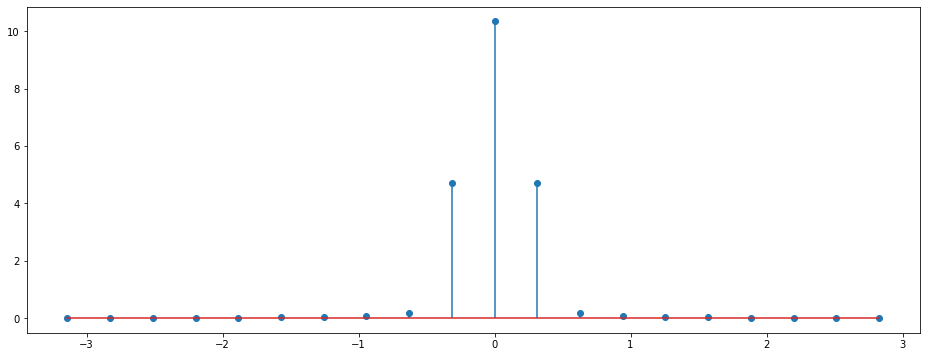

In [8]:
X, w = DTFTsamples(x)
plt.stem(w, abs(X))
plt.show()

<h3 style="color:salmon;"><left>2.2 Zero Padding</left></h3>

The spacing between samples of the DTFT is determined by the number of points in the DFT. This can lead to surprising results when the number of samples is too small. In order to illustrate this effect, consider the finite-duration signal

\begin{align*}
    x[n]=\begin{cases}
            \sin(0.1\pi n)&0\leq n \leq 49\\
            0&\text{otherwise}
        \end{cases}\tag{4}
\end{align*}

In the following, you will compute the DTFT samples of $x[n]$ using both $N = 50$ and $N=200$ point DFT's. Notice that when $N = 200$, most of the samples of $x[n]$ will be zeros because $x[n] = 0$ for $n \geq 50$. This technique is known as “zero padding”, and may be used to produce a finer sampling of the DTFT.

<h3 style="color:red;"><left>Exercise 2.2: Zero Padding</left></h3>

**1. For $N=50$, compute the vector $x$ containing the values $x[0],\dots, x[N − 1]$, then compute the samples of $X[k]$ using your function ```DTFTsamples()```, and finally plot the magnitude of the DTFT samples versus frequency in rad/sample.**

In [9]:
# insert your code here


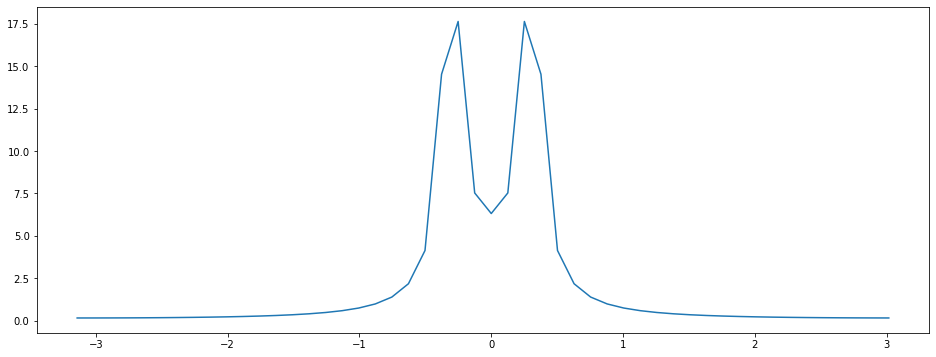

In [10]:
# N = 50
n = np.arange(50)
x = np.sin(0.1 * np.pi * n)
N = 50
x50 = np.zeros(N)
x50[:N] = x
X, w = DTFTsamples(x50)
plt.plot(w, abs(X))
plt.show()

**2. For $N=100$, compute the vector $x$ containing the values $x[0],\dots, x[N − 1]$, then compute the samples of $X[k]$ using your function ```DTFTsamples()```, and finally plot the magnitude of the DTFT samples versus frequency in rad/sample.**

In [11]:
# insert your code here


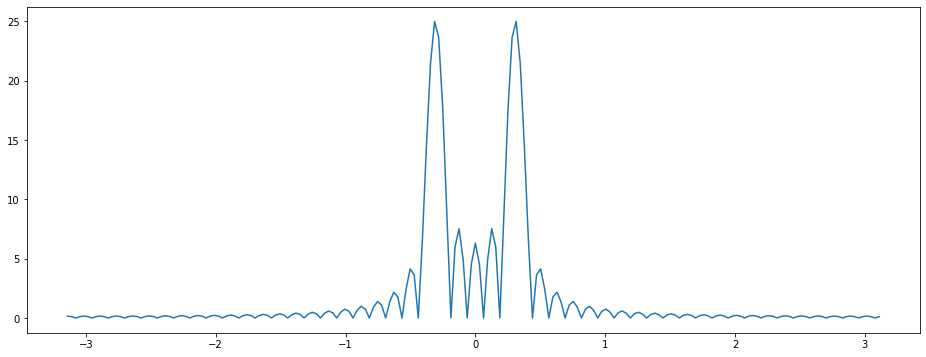

In [12]:
# N = 200
n = np.arange(50)
x = np.sin(0.1 * np.pi * n)
N = 200
x200 = np.zeros(N)
x200[:50] = x
X, w = DTFTsamples(x200)
plt.plot(w, abs(X))
plt.show()

**3. Which plot looks more like the true DTFT?**

insert your answer here

The second plot looks more the true DTFT.

**3. Explain why the plots look so different.**

insert your answer here

More samples are produced.

<h2 style="color:salmon;"><left>3. The Fast Fourier Transform Algorithm</left></h2>

We have seen in the preceding sections that the DFT is a very computationally intensive operation. In 1965, Cooley and Tukey [1] published an algorithm that could be used to compute the DFT much more efficiently. Various forms of their algorithm, which came to be known as the fast Fourier transform (FFT), had actually been developed much earlier by other mathematicians (even dating back to Gauss). It was their paper, however, which stimulated a revolution in the field of signal processing.

It is important to keep in mind at the outset that the FFT is **NOT** a new transform. It is simply a very efficient way to compute an existing transform, namely the DFT. As we saw, a straight forward implementation of the DFT can be computationally expensive because the number of multiplies grows as the square of the input length (i.e. $N^2$ for an $N$ point DFT). The FFT reduces this computation using two simple but important concepts. The first concept, known as **divide-and-conquer**, splits the problem into two smaller problems. The second concept, known as **recursion**, applies this divide-and-conquer method repeatedly until the problem is solved.

Consider the defining equation for the DFT and assume that $N$ is even, so that $N/2$ is an integer:

\begin{align*}
    X[k]=\sum_{n=0}^{N-1}x[n]e^{-j2\pi kn/N}\tag{5}
\end{align*}

Here we have dropped the subscript of $N$ in the notation for $X[k]$. We will also use the notation

\begin{align*}
    X[k]=DFT_N[x[n]]
\end{align*}

to denote the $N$ point DFT of the signal $x[n]$.

Suppose we break the sum in (5) into two sums, one containing all the terms for which $n$ is even, and one containing all the terms for which $n$ is odd:

\begin{align*}
    X[k]=\sum_{n=0\\\text{$n$ even}}^{N-1}x[n]e^{-j2\pi kn/N}+\sum_{n=0\\n\text{ odd}}^{N-1}x[n]e^{-j2\pi kn/N}\tag{6}
\end{align*}

We can eliminate the conditions “$n$ even” and “$n$ odd” in (6) by making a change of variable in each sum. In the first sum, we replace $n$ by $2m$. Then as we sum $m$ from $0$ to $N/2 − 1$, $n = 2m$ will take on all even integer values between $0$ and $N − 2$. Similarly, in the second sum, we replace $n$ by $2m + 1$. Then as we sum $m$ from $0$ to $N/2 − 1$, $n = 2m + 1$ will take on all odd integer values between $0$ and $N − 1$. Thus, we can write

\begin{align*}
    X[k]=\sum_{m=0}^{N/2-1}x[2m]e^{-j2\pi k2m/N}+\sum_{m=0}^{N/2-1}x[2m+1]e^{-j2\pi k(2m+1)/N}\tag{7}
\end{align*}

Next we rearrange the exponent of the complex exponential in the first sum, and split and rearrange the exponent in the second sum to yield

\begin{align*}
    X[k]=\sum_{m=0}^{N/2-1}x[2m]e^{-j2\pi km/(N/2)}+e^{-j2\pi k/N}\sum_{m=0}^{N/2-1}x[2m+1]e^{-j2\pi km/(N/2)}\tag{8}
\end{align*}

Now compare the first sum in (8) with the definition for the DFT given by (5). They have exactly the same form if we replace $N$ everywhere in (5) by $N/2$. Thus the first sum in (8) is an $N/2$ point DFT of the even-numbered data points in the original sequence. Similarly, the second sum in (8) is an $N/2$ point DFT of the odd-numbered data points in the original sequence. To obtain the $N$ point DFT of the complete sequence, we multiply the DFT of the odd-numbered data points by the complex exponential factor $e^{−j2\pi k/N}$, and then simply sum the two $N/2$ point DFTs.

To summarize, we will rewrite (8) according to this interpretation. First, we define two new $N/2$ point data sequences $x_0[n]$ and $x_1[n]$, which contain the even and odd-numbered data points from the original $N$ point sequence, respectively:

\begin{align*}
    x_0[n]&=x[2n]\tag{9}\\
    x_1[n]&=x[2n+1]
\end{align*}

where $n = 0, \dots, N/2 − 1$. This separation of even and odd points is called *decimation in time*. The $N$ point DFT of $x[n]$ is then given by

\begin{align*}
    X[k]=X_0[k]+e^{-j2\pi k/N}X_1[k]\quad\text{for}\quad k=0,\dots,N-1\tag{10}
\end{align*}

where $X_0[k]$ and $X_1[k]$ are the $N/2$ point DFT’s of the even and odd points.

\begin{align*}
    X_0[k]=DFT_{N/2}[x_0[n]]\tag{11}\\
    X_1[k]=DFT_{N/2}[x_1[n]]
\end{align*}

While equation (10) requires less computation than the original $N$ point DFT, it can still be further simplified. First, note that each $N/2$ point DFT is periodic with period $N/2$. This means that we need to only compute $X_0[k]$ and $X_1[k]$ for $N/2$ values of $k$ rather than the $N$ values shown in (10). Furthermore, the complex exponential factor $e^{−j2\pi k/N}$ has the property that

\begin{align*}
    -e^{-j2\pi \frac{k}{N}}=e^{-j2\pi\frac{k+N/2}{N}}.
\end{align*}

These two facts may be combined to yield a simpler expression for the $N$ point $DFT$:

\begin{align*}
        X[k]&=X_0[k]+W_N^kX_1[k]\tag{12}\\
        X[k+N/2]&=X_0[k]-W_N^kX_1[k]
\end{align*}
for $k=0,\dots,N/2-1$, where the complex constants defined by $W_N^k=e^{-j2\pi k/N}$ are commonly known as the **twiddle factors**.

<figure>
    <img src="imgs/figure1.png" style="width:70%">
    <em><center>Figure 1: Divide and conquer DFT of equation (12). The $N$-point DFT is
computed using the two $N/2$-point DFT’s $X_0^{(N/2)}[k]$ and $X_1^{(N/2)}[k]$.</center></em>
</figure>

Figure 1 shows a graphical interpretation of (12) which we will refer to as the "divide-and conquer DFT". We start on the left side with the data separated into even and odd subsets. We perform an $N/2$ point DFT on each subset, and then multiply the output of the odd DFT by the required twiddle factors. The first half of the output is computed by adding the two branches, while the second half is formed by subtraction. This type of flow diagram is conventionally used to describe a fast Fourier transform algorithm.

<h3 style="color:red;"><left>Exercise 3.1: Implementation of Divide-and-Conquer DFT</left></h3>

In this section, you will implement the DFT transformation using equation (12) and the illustration in Figure 1.

**1. Complete the function `dcDFT` below.**

In [13]:
def dcDFT(x):
    """
    Parameters:
    ---
    x: a vector of even length N
    
    Returns: the DFT of x
    """
    
    # Step 1
    # Separate the samples of x into even and odd points.
    # Hint: The Python function x0 = x[0:N:2] can be used to obtain the “even” points.
    
    # Step 2
    # Use your function DFTsum to compute the two N/2 point DFT’s.
    
    # Step 3
    # Multiply by the twiddle factors$
    
    # Step 4
    # Combine the two DFT’s to form X
    
    X = None
    return X

In [14]:
def dcDFT(x):
    N = len(x)
    k = np.arange(N/2)
    x0 = x[0::2]
    x1 = x[1::2]
    
    X0 = DFTsum(x0)
    X1 = DFTsum(x1)
    
    X_0 = X0 + np.exp(-1j * 2 * np.pi * k / N) * X1
    X_1 = X0 - np.exp(-1j * 2 * np.pi * k / N) * X1
    
    X = np.concatenate((X_0, X_1), 0)
    return X

**2. Test your function ```dcDFT``` by using it to compute and plot the DFT’s of the following signals:**

* $x[n]=\delta[n]$ for $N=10$
* $x[n]=1$ for $N=10$
* $x[n]=e^{j2\pi n/10}$ for $N=10$

**Make sure you plot the results in separate cells.**

In [15]:
# first signal


In [16]:
# second signal


In [17]:
# third signal


In [18]:
N = 10
n = np.arange(N)
k = np.arange(N)

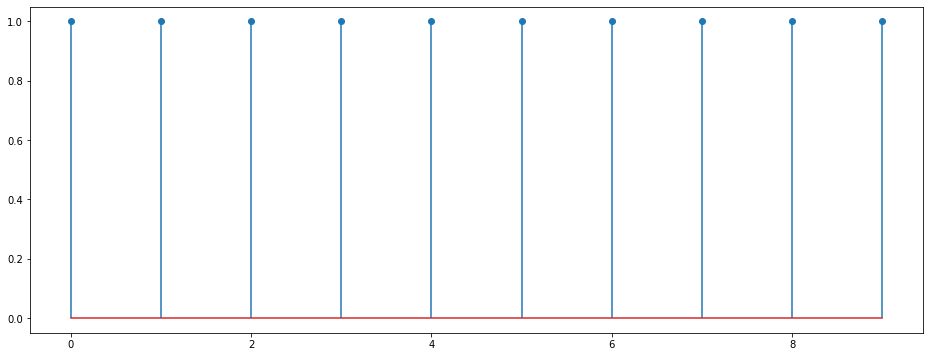

In [19]:
# first signal
x1 = (n == 0).astype(int)
X1 = dcDFT(x1)
plt.stem(k, abs(X1))
plt.show()

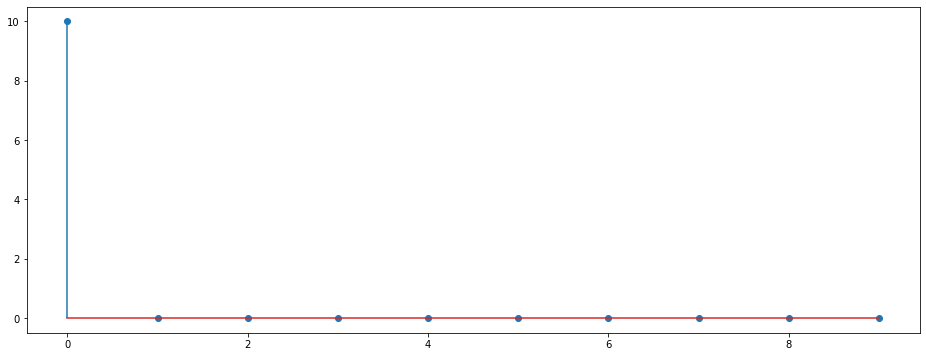

In [20]:
# second signal
x2 = (n == n).astype(int)
X2 = dcDFT(x2)
plt.stem(k, abs(X2))
plt.show()

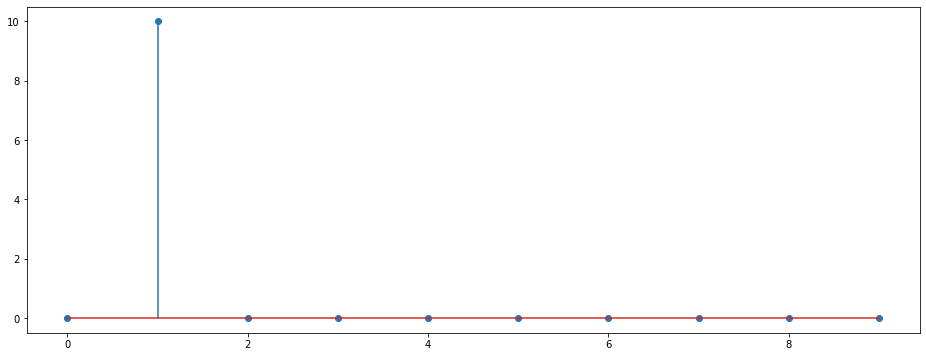

In [21]:
# third signal
x3 = np.exp(1j * 2 * np.pi * n / 10)
X3 = dcDFT(x3)
plt.stem(k, abs(X3))
plt.show()

**3. Determine the number of multiplies that are required in this approach to computing an $N$ point DFT. (Consider a multiply to be one multiplication of real or complex numbers.)**

**Hint:** Refer to the diagram of Figure 1, and remember to consider the $N/2$ point DFTs.

insert your answer here

<h3 style="color:salmon;"><left>3.2 Recursive Divide and Conquer (Part 1)</left></h3>

The second basic concept underlying the FFT algorithm is that of recursion. Suppose $N/2$ is also even. Then we may apply the same decimation-in-time idea to the computation of each of the $N/2$ point DFT’s in Figure 1. This yields the process depicted in Figure 2. We now have two stages of twiddle factors instead of one.

<figure>
    <img src="imgs/figure2.png" style="width:80%">
    <em><center>Figure 2: Recursion of the decimation-in-time process. Now each $N/2$-point is calculated by combining two $N/4$-point DFT’s.</center></em>
</figure>

How many times can we repeat the process of decimating the input sequence? Suppose $N$ is a power of $2$, i.e. $N = 2^p$ for some integer $p$. We can then repeatedly decimate the sequence until each subsequence contains only two points. It is easily seen from (5) that the $2$ point DFT is a simple sum and difference of values.

\begin{align*}
    X[0]&=x[0]+x[1]\tag{13}\\
    X[1]&=x[0]-x[1]
\end{align*}

Figure 3 shows the flow diagram that results for an $8$ point DFT when we decimate $3$ times. Note that there are $3$ stages of twiddle factors (in the first stage, the twiddle factors simplify to “$1$”). This is the flow diagram for the complete decimation-in-time $8$ point FFT algorithm. How many multiplies are required to compute it?

<figure>
    <img src="imgs/figure3.png" style="width:70%">
    <em><center>Figure 3: 8-Point FFT.</center></em>
</figure>

<h3 style="color:red;"><left>Exercise 3.2: Recursive Divide and Conquer (Part 1)</left></h3>

**1. Complete the Python functions below to compute the $2$, $4$, and $8$-point FFT’s.**

**Note:** The function ```FFT2``` should directly compute the $2$-point DFT using (13), but the functions ```FFT4``` and ```FFT8``` should compute their respective FFT’s using the divide and conquer strategy. This means that ```FFT8``` should call ```FFT4```, and ```FFT4``` should call ```FFT2```.

In [22]:
def FFT2(x):
    """
    Parameters:
    ---
    x: the input signal
    
    Returns:
    ---
    X: the 2-point DFT of x
    """
    X = None
    return X

In [23]:
def FFT4(x):
    """
    Parameters:
    ---
    x: the input signal
    
    Returns:
    ---
    X: the 4-point DFT of x
    """
    X = None
    return X

In [24]:
def FFT8(x):
    """
    Parameters:
    ---
    x: the input signal
    
    Returns:
    ---
    X: the 8-point DFT of x
    """
    X = None
    return X

In [25]:
def FFT2(x):
    X = np.zeros(2).astype(complex)
    X[0] = x[0] + x[1]
    X[1] = x[0] - x[1]
    return X


def FFT4(x):
    N = 4
    X = np.zeros(N).astype(complex)
    k = np.arange(N / 2)
    w = np.exp(-1j * 2 * np.pi * k / N)
    X0 = FFT2(x[0::2])
    X1 = FFT2(x[1::2])
    X_0 = X0 + w * X1
    X_1 = X0 - w * X1
    X = np.concatenate((X_0, X_1), 0)
    return X


def FFT8(x):
    N = 8
    X = np.zeros(N).astype(complex)
    k = np.arange(N / 2)
    w = np.exp(-1j * 2 * np.pi * k / N)
    X0 = FFT4(x[0::2])
    X1 = FFT4(x[1::2])
    X_0 = X0 + w * X1
    X_1 = X0 - w * X1
    X = np.concatenate((X_0, X_1), 0)
    return X

**2. Test your function ```FFT8``` by using it to compute the DFT’s of the following signals. Compare these results to the previous ones.**

* $x[n]=\delta[n]$ for $N=8$
* $x[n]=1$ for $N=8$
* $x[n]=e^{j2\pi n/8}$ for $N=8$

**Make sure you plot the results in separate cells.**

In [26]:
# first signal


In [27]:
# second signal


In [28]:
# third signal


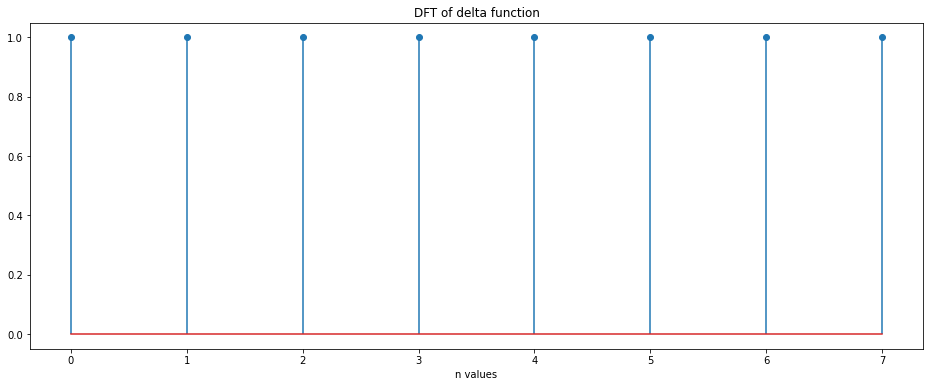

In [29]:
# first signal
N = 8

n = np.arange(0, N, 1)

x1 = (n == 0).astype(int) 

X1 = FFT8(x1) 

plt.stem(n, abs(X1))
plt.title('DFT of delta function')
plt.xlabel('n values')
plt.show()

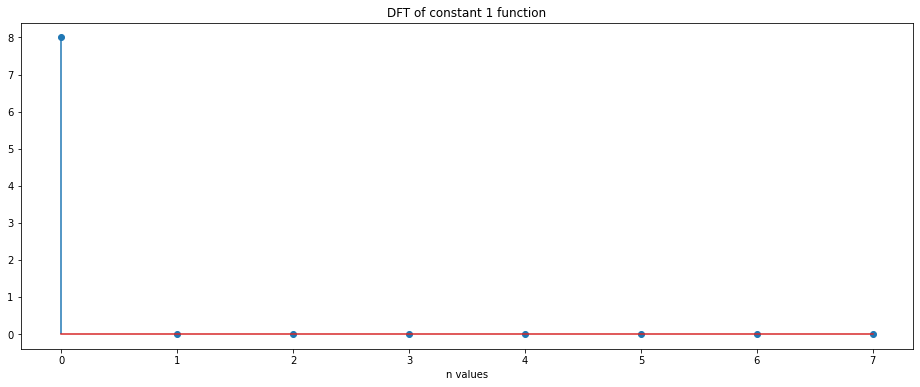

In [30]:
# second signal
x2 = (n == n).astype(int)

X2 = FFT8(x2)

plt.stem(n, abs(X2))
plt.title('DFT of constant 1 function')
plt.xlabel('n values')
plt.show()

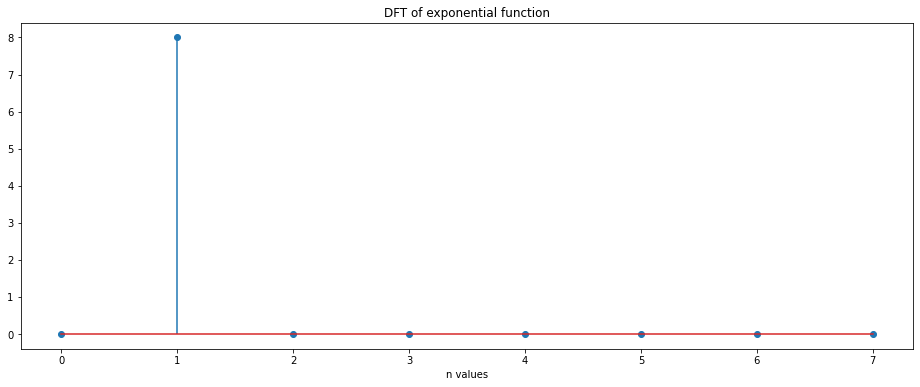

In [31]:
# third signal
x3 = np.exp(1j*2*np.pi*n/8)

X3 = FFT8(x3)

plt.stem(n, abs(X3))
plt.title('DFT of exponential function')
plt.xlabel('n values')
plt.show()

**3. List the output (not plot) of ```FFT8``` for the case $x[n] = 1$ for $N = 8$.**

In [32]:
# insert your code here


In [33]:
N = 8
n = np.arange(N)
k = np.arange(N)
x2 = (n == n).astype(int)
X2 = FFT8(x2)
print(X2)

[8.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


**4. Calculate the total number of multiplies by twiddle factors required for your 8-point FFT. (A multiply is a multiplication by a real or complex number.)**

insert your answer here

**5. Determine a formula for the number of multiplies required for an $N = 2^p$ point FFT. Leave the expression in terms of $N$ and $p$. How does this compare to the number of multiplies required for direct implementation when $p = 10$?**

insert your answer here

<h3 style="color:red;"><left>Exercise 3.3: Recursive Divide and Conquer (Part 2)</left></h3>

If you wrote the ```FFT4``` and ```FFT8``` functions properly, they should have almost the exact same form. The only difference between them is the length of the input signal, and the function called to compute the ($N/2$)-pt DFTs. Obviously, it’s redundant to write a separate function for each specific length DFT when they each have the same form. The preferred method is to write a **recursive** function, which means that the function calls itself within the body. It is imperative that a recursive function has a condition for exiting without calling itself, otherwise it would never terminate.

**1. Complete the recursive function `fft_stage` below to perform one stage of the FFT algorithm for a power-of-2 length signal.**

**Note:** the body of this function should look very similar to previous functions written in this lab.

In [34]:
def fft_stage(x):
    """
    Performs one stage of the FFT algorithm for a power-of-2 length signal
    
    Parameters:
    ---
    x: a power-of-2 length signal
    
    Returns:
    ---
    X: the DFT of the inpu signal
    """
    
    # Step 1
    # Determine the length of the input signal.
    
    # Step 2
    # If N == 2, then the function should just compute the 2-pt DFT as in equation (13), and then return.
    
    # Step 3
    # If N > 2, then the function should perform the FFT steps described previously 
    # (i.e. decimate, compute (N/2)-pt DFTs, re-combine), 
    # calling fft_stage(x) to compute the (N/2)-pt DFTs.
    
    X = None
    return X

In [35]:
def fft_stage(x):
    N = len(x)
    X = np.zeros(N).astype(complex)
    if N == 2:
        X[0] = x[0] + x[1]
        X[1] = x[0] - x[1]
        return X
    else:
        k = np.arange(N / 2)
        w = np.exp(-1j * 2 * np.pi * k / N)
        X0 = fft_stage(x[0::2])
        X1 = fft_stage(x[1::2])
        X_0 = X0 + w * X1
        X_1 = X0 - w * X1
        X = np.concatenate((X_0, X_1), 0)
        return X

**2. Test ```fft_stage(x)``` on the three 8-point signals given above, and verify that it returns the same results as ```FFT8(x)```.**

**Make sure you plot the results in separate cells.**

In [36]:
# first signal


In [37]:
# second signal


In [38]:
# third signal


In [39]:
N = 8
n = np.arange(N)
k = np.arange(N)

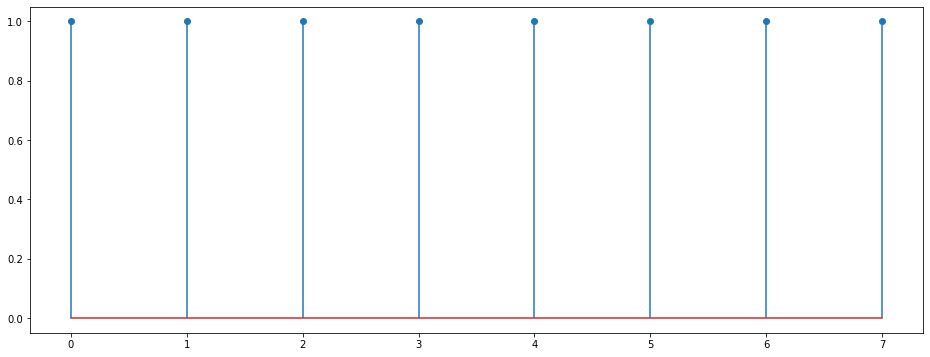

In [40]:
x1 = (n == 0).astype(int)
X1 = fft_stage(x1)
plt.stem(k, abs(X1))
plt.show()

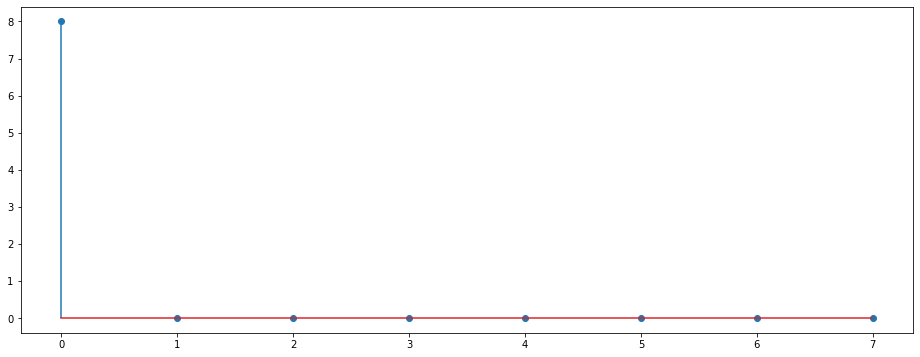

In [41]:
x2 = (n == n).astype(int)
X2 = fft_stage(x2)
plt.stem(k, abs(X2))
plt.show()

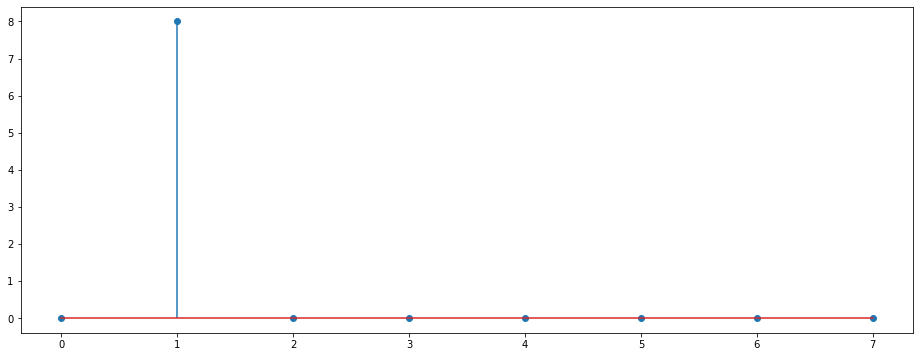

In [42]:
x3 = np.exp(1j * 2 * np.pi * n / 8)
X3 = fft_stage(x3)
plt.stem(k, abs(X3))
plt.show()

<h2 style="color:salmon;"><left>4. References</left></h2>

[1] J. W. Cooley and J. W. Tukey, “An algorithm for the machine calculation of complex
Fourier series,” Mathematics of Computation, vol. 19, no. 90, p. 297-301, April 1965.